# Foundations of Data Mining: Assignment 3
Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all" 

##  Random Projections with 1-NN (6 points, 3+3)

Implement random projections for dimensionality reduction as follows.
Randomly generate a $k \times d$ matrix $\bf R$ by choosing its coefficients
$$
r_{i,j}=
\begin{cases}
+\frac{1}{{\sqrt{d}}} \quad \text{with probability}\quad &\frac{1}{2}\\
-\frac{1}{\sqrt{d}} \quad \text{with probability} \quad & \frac{1}{2}
\end{cases}
$$ 
Let $f:\mathbb{R}^d \rightarrow \mathbb{R}^k$ denote the linear mapping function that 
multiplies a $d$-dimensional vector with this matrix $f(p)={\bf R}p$.
For the following exercises use the same data set as was used for Assignment 1 (MNIST). 
Use the following values of $k=45,90,400$ in your experiments.  
You should _not_ use sklearn.random_projection for this assignment.


###  Study the effect on pairwise distances
Evaluate how well the Euclidean distance is preserved by plotting a histogram of the 
values $\phi(p,q) = \frac{\|f(p)-f(q)\|}{\|p-q\|}$ for all pairs of the first 500 images of the MNIST data set. These values should be concentrated around a certain value for fixed $k$. What is this value expressed in terms of $k$ and $d$? Explain your answer.


In [2]:
# This is a temporary read-only OpenML key. Replace with your own key later. 
oml.config.apikey = '11e82c8d91c5abece86f424369c71590'

In [3]:
mnist_data = oml.datasets.get_dataset(554) # Download MNIST data
# Get the predictors X and the labels y
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute); 

In [4]:
# Randomly sample with probability 1/2
np.random.randint(0,2)

1

The code below offers an implementation for this part of the assignment. Firstly the matrix R is constructed based on the 'k' and 'd' variables, where k is varied between 45,90,400 and d is 784, the number of features for the 28x28 images. Once these are created all 500 images are compared to one another except for when the image is exactly the same to make sure no division by 0 occurs. This comparison takes the euclidean distance when both images are multiplied on R (function f(p)) as well as the euclidean distance between the two base images. The former is then divided by the latter to obtain the requested value. These values are then plotted in a histogram. Additional explanations on the outcomes are found below. 

Average for the upper part is
22.5842194337
Average for computed values is
0.00885291618695


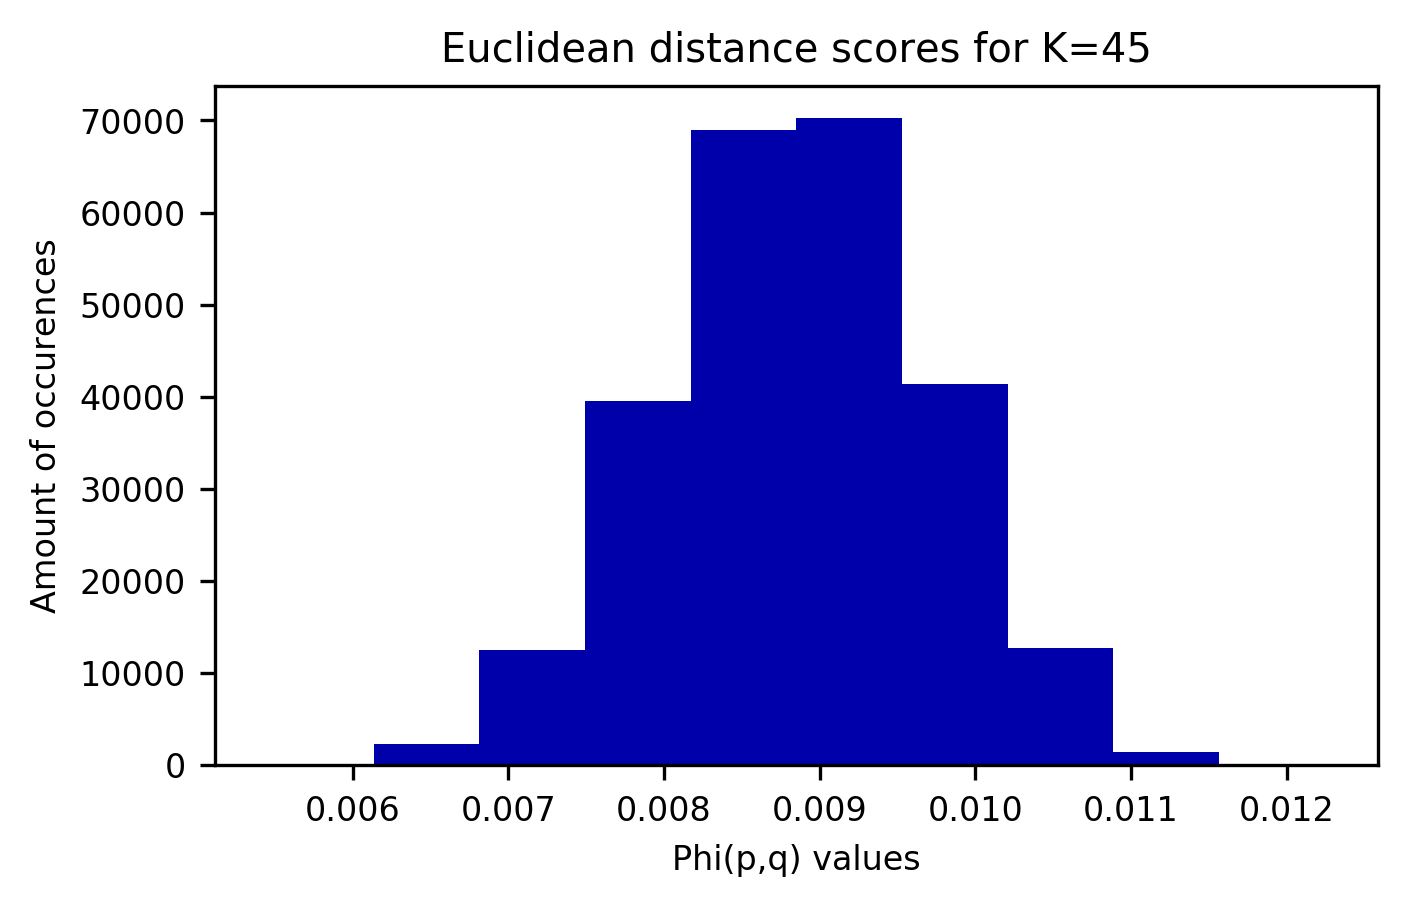

In [32]:
from preamble import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


#Standard OML get data stuff
oml.config.apikey = '366585f9ec2435e0f2543d5175e1bac5'
mnist_data = oml.datasets.get_dataset(554) # Download MNIST data
# Get the predictors X and the labels y
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute)
#Take only first 500 elements
X = X[:500]
y = y[:500]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30, train_size=0.8)

#Use the following values of $k=45,90,400$ in your experiments.
#K is the number of dimensions in the created subspace
k=45

#D is the number of dimensions in the original dataset
d=784

#Create the R matrix
rMatrix = [[0 for aaaaa in range(k)] for bbbbb in range(d)]
for i in range(0,d):
    for j in range(0,k):
        coinFlip = np.random.randint(0,2)
        if (coinFlip == 0):
            rMatrix[i][j] = 1/d
        else:
            rMatrix[i][j] = -(1/d)

storepart1 = []
storepart2 = []

storeEDistances = []
rTransp = np.transpose(rMatrix)
#Loop over all combos that do not include the same image
for i in range(0,500):
    for j in range(0,500):
        #Skip if same image
        if(i==j):
            continue
        else:
            # Resize the thing to make it acceptable by np.dot
            firstIMG = np.array(X[i],None)
            secondIMG = np.array(X[j],None)

            fpX1 = np.dot(rTransp, firstIMG)
            fpX2 = np.dot(rTransp, secondIMG)

            part1 = np.linalg.norm(abs(fpX1 - fpX2))
            part2 = np.linalg.norm(firstIMG - secondIMG)

            part3 = np.divide(part1, part2)

            storeEDistances.append(part3)
            storepart1.append(part1)
            storepart2.append(part2)

print("Average for the upper part is")
print(np.mean(storepart1))
# plt.hist(storepart1)
# plt.show()

print("Average for computed values is")
print(np.mean(storeEDistances))

plt.hist(storeEDistances)
plt.xlabel('Phi(p,q) values')
plt.ylabel('Amount of occurences')
plt.title('Euclidean distance scores for K=45')

plt.show()

Average for the upper part is
30.6305854813
Average for computed values is
0.012006370321


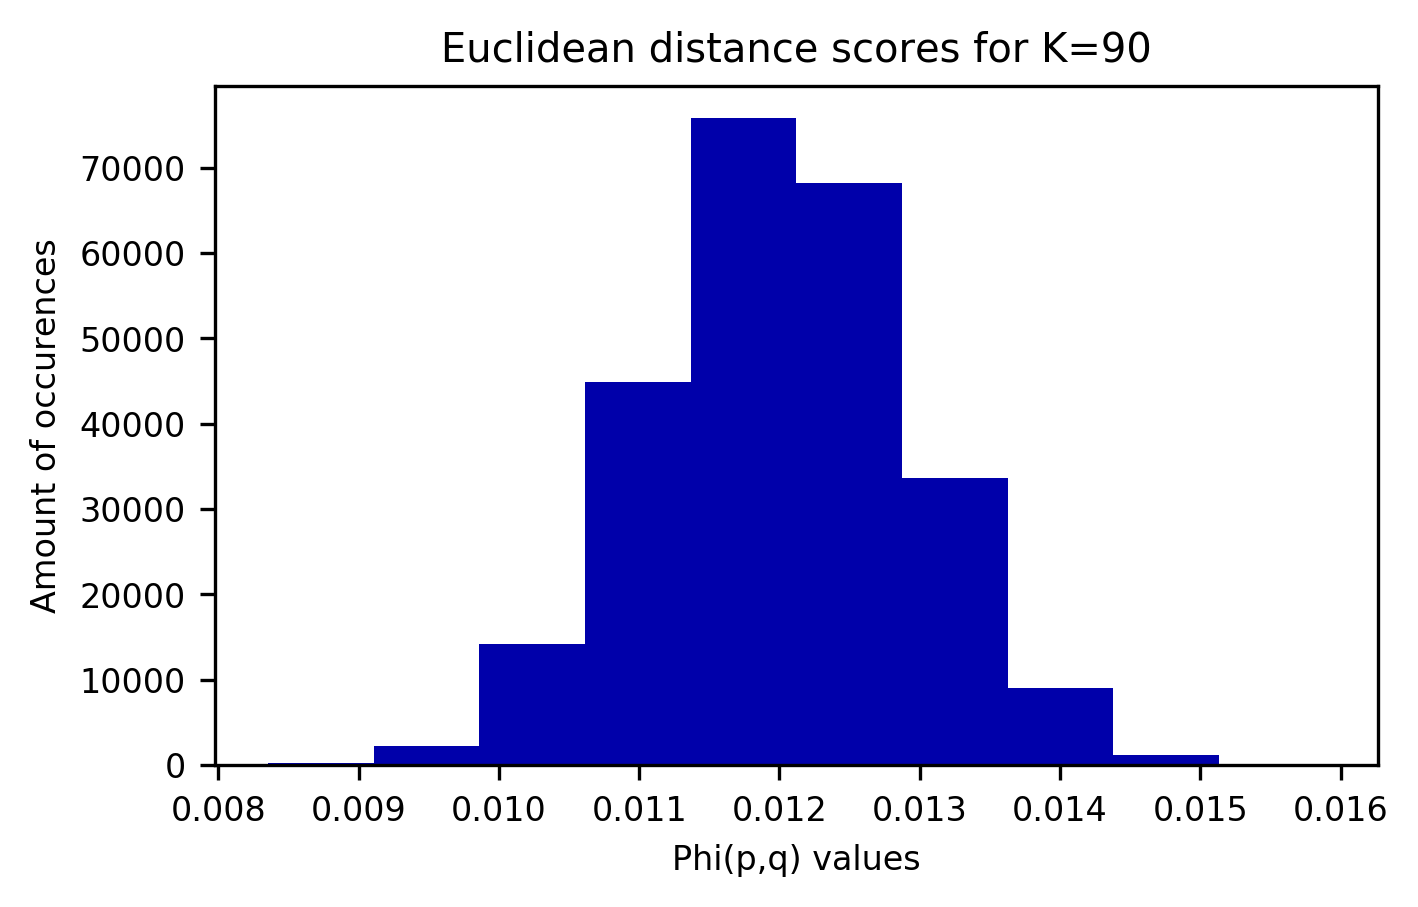

In [33]:
#Use the following values of $k=45,90,400$ in your experiments.
#K is the number of dimensions in the created subspace
k=90

#D is the number of dimensions in the original dataset
d=784

#Create the R matrix
rMatrix = [[0 for aaaaa in range(k)] for bbbbb in range(d)]
for i in range(0,d):
    for j in range(0,k):
        coinFlip = np.random.randint(0,2)
        if (coinFlip == 0):
            rMatrix[i][j] = 1/d
        else:
            rMatrix[i][j] = -(1/d)

storepart1 = []
storepart2 = []

storeEDistances = []
rTransp = np.transpose(rMatrix)
#Loop over all combos that do not include the same image
for i in range(0,500):
    for j in range(0,500):
        #Skip if same image
        if(i==j):
            continue
        else:
            # Resize the thing to make it acceptable by np.dot
            firstIMG = np.array(X[i],None)
            secondIMG = np.array(X[j],None)

            fpX1 = np.dot(rTransp, firstIMG)
            fpX2 = np.dot(rTransp, secondIMG)

            part1 = np.linalg.norm(abs(fpX1 - fpX2))
            part2 = np.linalg.norm(firstIMG - secondIMG)

            part3 = np.divide(part1, part2)

            storeEDistances.append(part3)
            storepart1.append(part1)
            storepart2.append(part2)

print("Average for the upper part is")
print(np.mean(storepart1))
# plt.hist(storepart1)
# plt.show()

print("Average for computed values is")
print(np.mean(storeEDistances))

plt.hist(storeEDistances)
plt.xlabel('Phi(p,q) values')
plt.ylabel('Amount of occurences')
plt.title('Euclidean distance scores for K=90')

plt.show()

Average for the upper part is
64.9117152328
Average for computed values is
0.0254547587032


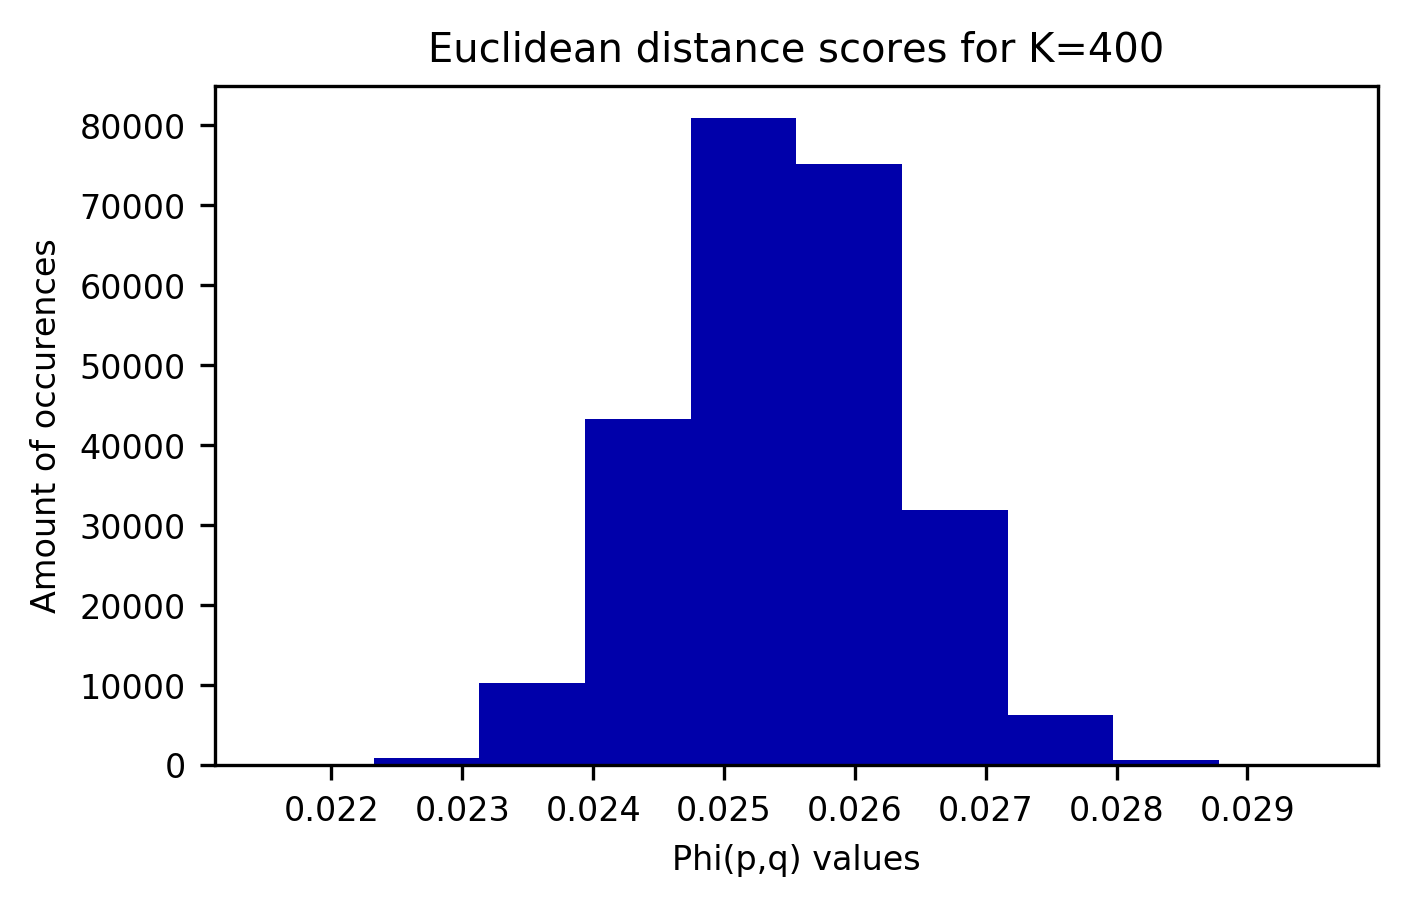

In [19]:
#Use the following values of $k=45,90,400$ in your experiments.
#K is the number of dimensions in the created subspace
k=400

#D is the number of dimensions in the original dataset
d=784

#Create the R matrix
rMatrix = [[0 for aaaaa in range(k)] for bbbbb in range(d)]
for i in range(0,d):
    for j in range(0,k):
        coinFlip = np.random.randint(0,2)
        if (coinFlip == 0):
            rMatrix[i][j] = 1/d
        else:
            rMatrix[i][j] = -(1/d)

storepart1 = []
storepart2 = []

storeEDistances = []
rTransp = np.transpose(rMatrix)
#Loop over all combos that do not include the same image
for i in range(0,500):
    for j in range(0,500):
        #Skip if same image
        if(i==j):
            continue
        else:
            # Resize the thing to make it acceptable by np.dot
            firstIMG = np.array(X[i],None)
            secondIMG = np.array(X[j],None)

            fpX1 = np.dot(rTransp, firstIMG)
            fpX2 = np.dot(rTransp, secondIMG)

            part1 = np.linalg.norm(fpX1 - fpX2)
            part2 = np.linalg.norm(firstIMG - secondIMG)

            part3 = np.divide(part1, part2)

            storeEDistances.append(part3)
            storepart1.append(part1)
            storepart2.append(part2)

print("Average for the upper part is")
print(np.mean(storepart1))
# plt.hist(storepart1)
# plt.show()

print("Average for computed values is")
print(np.mean(storeEDistances))

plt.hist(storeEDistances)
plt.xlabel('Phi(p,q) values')
plt.ylabel('Amount of occurences')
plt.title('Euclidean distance scores for K=400')

plt.show()

As one can see by looking at the different histograms the overall structure of the bars is very similar between the different $K$ values. Especially for $K$ = 90 and $K$ = 400 the shape looks exactly identical, and for $K$ = 45 the biggest bar is now on the right in the middle instead of the left with the bar following it being nearer to 40000 occurances instead of the 30000 to which it is closer in the other histograms. As one might have noticed there is one large difference between the different histograms, namely the values along the X axis. Seeing as how ${\|p-q\|}$ is always the same value no matter what $K$ is, the cause for this has to lie in the upper part of the equation, namely ${\|f(p)-f(q)\|}$. This seems to be caused by the higher K values leading to more features being available to the created values, which makes them more distinct and also allows the Euclidean distance to increase due to the formula now being able to more clearly assess that the two points are indeed very different from one another. This then leads to higher overall values as the upper half of the equation increases while the bottom stays the same.

We know that between the different $K$-values the means are  0.00885291618695, 0.012006370321, and 0.0254547587032 for the computed values, which is incidentally what the values are centered around for 45, 90, and 400 as $K$ values. Between 90 and 400 the computed value is slightly more than doubled, while between 45 and 90 it increases by about 35%. The computed value thus seems to increase sharply in the beginning while not increasing as much for later, larger values. 

TODO: "These values should be concentrated around a certain value for fixed $k$. What is this value expressed in terms of $k$ and $d$? Explain your answer." 





















### Study the effect on classification
Compare the performance of a $1$-NN classifier with and without random projection. Report multi-class confusion matrix, precision and recall for each class with and without projection and for each value of $k$. Evaluate your findings with respect to the use of random projections and classification.

In the following 4 code blocks the requested performance metrics are calculated and returned for the base dataset, and when K is 45, 90 or 400 and the original dataset is adapted based on R to achieve the random projection. It should be noted that it is unclear if this part should still only use the first 500 samples of the dataset, it is assumed that this is the case. Performance on a bigger set (e.g. first 2500 samples) can lead to a situation where K=90 and K=400 are able to match the performace of using the entire range of features. If this is the case using only 500 samples can be seen below. 

In [17]:
###Part 2
# train a classifier on the initial values
originalModel = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
originalModel.fit(X_train, y_train)
# evaluate the model and update the list of accuracies
print(metrics.classification_report(originalModel.predict(X_test), y_test))
print(metrics.confusion_matrix(originalModel.predict(X_test),y_test))

             precision    recall  f1-score   support

          0       1.00      0.83      0.91         6
          1       0.92      0.79      0.85        14
          2       0.82      0.90      0.86        10
          3       1.00      0.92      0.96        12
          4       1.00      0.86      0.92        14
          5       0.70      0.88      0.78         8
          6       1.00      1.00      1.00         7
          7       0.70      1.00      0.82         7
          8       0.86      1.00      0.92         6
          9       1.00      0.94      0.97        16

avg / total       0.92      0.90      0.90       100

[[ 5  0  0  0  0  0  0  1  0  0]
 [ 0 11  1  0  0  2  0  0  0  0]
 [ 0  1  9  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  1  0  0  0  0]
 [ 0  0  1  0 12  0  0  1  0  0]
 [ 0  0  0  0  0  7  0  0  1  0]
 [ 0  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  1  0 15]]


In [27]:
#Use the following values of $k=45,90,400$ in your experiments.
#K is the number of dimensions in the created subspace
k=45

#D is the number of dimensions in the original dataset
d=784

#Create the R matrix
rMatrix = [[0 for aaaaa in range(k)] for bbbbb in range(d)]
for i in range(0,d):
    for j in range(0,k):
        coinFlip = np.random.randint(0,2)
        if (coinFlip == 0):
            rMatrix[i][j] = 1/d
        else:
            rMatrix[i][j] = -(1/d)

# create the random projection
fP= np.dot(X,rMatrix)
X_trainRand, X_testRand, y_trainRand, y_testRand = train_test_split(fP, y, random_state=30, train_size=0.8)
# train a classifier on the sparse random projection
rpModel = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
rpModel.fit(X_trainRand, y_trainRand)
# evaluate the model and update the list of accuracies
predictLabels = rpModel.predict((X_testRand))
print(metrics.classification_report(predictLabels, y_testRand))
print(metrics.confusion_matrix(predictLabels,y_testRand))

             precision    recall  f1-score   support

          0       0.80      0.80      0.80         5
          1       0.92      0.69      0.79        16
          2       0.64      1.00      0.78         7
          3       0.91      0.91      0.91        11
          4       0.83      0.77      0.80        13
          5       0.50      0.83      0.62         6
          6       0.86      0.86      0.86         7
          7       0.60      0.67      0.63         9
          8       0.57      0.67      0.62         6
          9       0.93      0.70      0.80        20

avg / total       0.80      0.77      0.78       100

[[ 4  0  0  0  0  0  0  0  0  1]
 [ 0 11  2  0  0  1  1  1  0  0]
 [ 0  0  7  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  1  0  0  0  0]
 [ 0  0  1  0 10  0  0  2  0  0]
 [ 0  0  0  0  0  5  0  0  1  0]
 [ 0  0  0  0  0  1  6  0  0  0]
 [ 1  1  0  0  0  1  0  6  0  0]
 [ 0  0  1  0  0  1  0  0  4  0]
 [ 0  0  0  1  2  0  0  1  2 14]]


In [28]:
#Use the following values of $k=45,90,400$ in your experiments.
#K is the number of dimensions in the created subspace
k=90

#D is the number of dimensions in the original dataset
d=784

#Create the R matrix
rMatrix = [[0 for aaaaa in range(k)] for bbbbb in range(d)]
for i in range(0,d):
    for j in range(0,k):
        coinFlip = np.random.randint(0,2)
        if (coinFlip == 0):
            rMatrix[i][j] = 1/d
        else:
            rMatrix[i][j] = -(1/d)

# create the random projection
fP= np.dot(X,rMatrix)
X_trainRand, X_testRand, y_trainRand, y_testRand = train_test_split(fP, y, random_state=30, train_size=0.8)
# train a classifier on the sparse random projection
rpModel = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
rpModel.fit(X_trainRand, y_trainRand)
# evaluate the model and update the list of accuracies
predictLabels = rpModel.predict((X_testRand))
print(metrics.classification_report(predictLabels, y_testRand))
print(metrics.confusion_matrix(predictLabels,y_testRand))

             precision    recall  f1-score   support

          0       1.00      0.83      0.91         6
          1       0.92      0.79      0.85        14
          2       0.73      0.89      0.80         9
          3       0.91      0.83      0.87        12
          4       0.92      0.79      0.85        14
          5       0.70      0.88      0.78         8
          6       1.00      1.00      1.00         7
          7       0.70      0.78      0.74         9
          8       0.71      1.00      0.83         5
          9       0.73      0.69      0.71        16

avg / total       0.83      0.82      0.82       100

[[ 5  0  0  0  0  0  0  0  1  0]
 [ 0 11  1  0  0  2  0  0  0  0]
 [ 0  1  8  0  0  0  0  0  0  0]
 [ 0  0  1 10  0  1  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  1  2]
 [ 0  0  1  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  7  0  2]
 [ 0  0  0  0  0  0  0  0  5  0]
 [ 0  0  0  1  1  0  0  3  0 11]]


In [31]:
#Use the following values of $k=45,90,400$ in your experiments.
#K is the number of dimensions in the created subspace
k=400

#D is the number of dimensions in the original dataset
d=784

#Create the R matrix
rMatrix = [[0 for aaaaa in range(k)] for bbbbb in range(d)]
for i in range(0,d):
    for j in range(0,k):
        coinFlip = np.random.randint(0,2)
        if (coinFlip == 0):
            rMatrix[i][j] = 1/d
        else:
            rMatrix[i][j] = -(1/d)

# create the random projection
fP= np.dot(X,rMatrix)
X_trainRand, X_testRand, y_trainRand, y_testRand = train_test_split(fP, y, random_state=30, train_size=0.8)
# train a classifier on the sparse random projection
rpModel = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
rpModel.fit(X_trainRand, y_trainRand)
# evaluate the model and update the list of accuracies
predictLabels = rpModel.predict((X_testRand))
print(metrics.classification_report(predictLabels, y_testRand))
print(metrics.confusion_matrix(predictLabels,y_testRand))

             precision    recall  f1-score   support

          0       1.00      0.71      0.83         7
          1       0.92      0.73      0.81        15
          2       0.82      0.90      0.86        10
          3       0.91      0.91      0.91        11
          4       1.00      0.92      0.96        13
          5       0.70      0.88      0.78         8
          6       0.86      1.00      0.92         6
          7       0.70      1.00      0.82         7
          8       0.86      1.00      0.92         6
          9       1.00      0.88      0.94        17

avg / total       0.90      0.88      0.88       100

[[ 5  0  1  0  0  0  0  1  0  0]
 [ 0 11  1  0  0  2  1  0  0  0]
 [ 0  1  9  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  1  0  0  0  0]
 [ 0  0  0  0 12  0  0  1  0  0]
 [ 0  0  0  0  0  7  0  0  1  0]
 [ 0  0  0  0  0  0  6  0  0  0]
 [ 0  0  0  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  0  0  0  6  0]
 [ 0  0  0  1  0  0  0  1  0 15]]


As one can see from the results, the base dataset offers the best overall precision and recall values when using 1-Nearest Neighbor classification. In general the results seem to improve as K gets higher when looking at the average precision and recall values, which indicates that if there are additional relevant features present that this improves the general performance for KNN despite the large number of features which could lead to more blurred distances between the different neighbors. It seems to be the case that here the dataset does indeed have distinct neighbors even with a large amount of features, which are grouped together well enough such that additional features always lead to increased performance. 

With regard to the individual classes, precision and recall can only be matched at best using any of the K values compared to when no random projection is used. In terms of precision there are some digits that benefit more from the higher K values than others, in particular the 0, 2, 5, and 8 seem to be less likely missclassified as additional features become available. These values are both slightly more complex than most in their structure while also not being present too often in the test set, making a single missclassification have a heavy impact on the overall score. 

In terms of recall there are some differences between the K values. A higher K value does not necesarily lead to a higher recall for every digit, as for example 2 has a 1.0 recall value when K is 45, while it is 0.89 for K=90 and 0.9 for K=400. Similarily, 0 has a better recall value for the lower K values as well. This thus indicates that the additional features make it so that other numbers might be guessed if they are ambiguous than when there are fewer features present, leading to an increase of recall for some numbers while for others it decreases. 

When looking at the multi-class confusion matrices that the number which is most often used wrongly, leading to a poor precision, is 5. In particular there are 2 missclassifications where a 2 is identifiedas a 5 which seems to be present for all 4 methods used, except when K=45. Similarily there is always one occurance of a 4 being identified as a 5, indicating that this specific instance likely has a lot of features that make it similar to a 4 making it always picked up on. For the better performing approaches there is not really one number which is the default guess in case the model does not know what to do, as in most cases any incorrect number is either used 0 or 1 times, and very rarely twice. A lower K value can lead to quite some additional 1's spread accross the matrix due to the lesser performance. These are not really concentrated on a certain part of the matrix but spread rarther evenly, indicating that more errors are made with respect to most if not all digits.  

## PCA of a handwritten digits (7 points, 3+2+2)
Analyze the first two principal components of the class with label $4$ of the MNIST data set (those are images that each depict a handwritten "4"). Perfom the steps (a), (b), (c) described below. Note that these steps are similar to the analysis given in the lecture. Include all images and plots in your report. You may use sklearn.decomposition.PCA for this assignment. Do not scale the data.

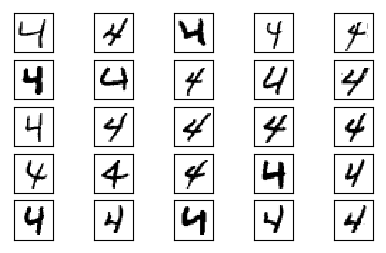

In [6]:
# build a list of figures on a 5x5 grid for plotting
def buildFigure5x5(fig, subfiglist):
    
    for i in range(0,25):
        pixels = np.array(subfiglist[i], dtype='float')
        pixels = pixels.reshape((28, 28))
        a=fig.add_subplot(5,5,i+1)
        imgplot =plt.imshow(pixels, cmap='gray_r')
        a.axes.get_xaxis().set_visible(False)
        a.axes.get_yaxis().set_visible(False)
    return

# find the first 25 instances with label '4' and plot them
imgs = np.empty([25, 28*28], dtype='float')
j=0
for i in range(0,len(X)):
    if(y[i] == 4) and j < 25:
        imgs[j] = np.array(X[i], dtype='float')
        j += 1

buildFigure5x5(plt.figure(1),imgs)
plt.show()

### Step (a)
 Generate a scatter plot of the data in the space spanned by the first two principal components of PCA. Reconstruct $25$ points on a $5 \times 5$ grid in this space that cover the variation of the data. Render each point as an image. Arrange the images in a $5 \times 5$ grid.


### Step (b) 
For each of the reconstructed points, find the original instance that is closest to it in the projection on the first two components (measured using Euclidean distance). Render the instances arranged in a $5 \times 5$ grid such that their position matches the rendering in (a).


### Step (c)
Render the mean and the first two principal components as images. What is your interpretation of the first two components, i.e., which aspect of the data do they capture? Justify your interpretation, also using your results of Steps (a) and (b).


## Projection onto a hyperplane (4 points)
Let $F$ be a $k$-dimensional hyperplane given by the parametric representation
$$ g(\lambda) = \mu + {\bf V} \lambda,$$
where $\mu \in \mathbb{R}^d$ and the columns of $\bf V$ are pairwise orthogonal and normal vectors $\bf v_1,\dots,v_k \in \mathbb{R}^d$.
Let $f:\mathbb{R}^d\rightarrow F$ be the projection that maps every point ${\bf p} \in \mathbb{R}^d$ to its nearest point on $F$ (where distances are measured using the Euclidean distance). We can also write $f$ as follows 
$$f({\bf p}) = g\left({\bf V}^T ({\bf p}-\mu)\right).$$

Prove that for any ${\bf p,q} \in \mathbb{R}^d$, it holds that
$$ \|f({\bf p})-f({\bf q})\| \leq \|{\bf p-q}\|. $$

(Hint: Assume first that $\mu=0$. Rewrite $f$ using a rotation followed by an orthogonal projection. What happens to the distance in each step? Generalize to arbitrary $\mu$.)


## Locality-sensitive hashing (3 points, 1+2)

$H$ is a family of $(d_1,d_2,p_1,p_2)$-locality-sensitive hash functions if it holds that
\begin{align}
\text{if}\quad d({\bf p,q})\leq d_1 \quad &\text{then}& \quad \Pr\left[ h({\bf p})=h({\bf q})\right] \geq p_1 \quad \\
\text{if}\quad d({\bf p,q})\geq d_2 \quad &\text{then}& \quad \Pr\left[ h({\bf p})=h({\bf q})\right] \leq p_2 \quad
\end{align}

### Case: $p_2=0$
Assume that $p_2=0$ and assume we have a total numer of $m$ hash
functions from this family available.  Which combination of AND-constructions
and OR-constructions should we use to amplify the hash family?



### Case: $p_2=\frac{1}{n}$
Now assume that $p_2=\frac{1}{n}$ and assume we have $n$ data points $\bf P$
which are stored in a hash table using a randomly chosen function $h$ from $H$.
Given a query point $\bf q$, we retrieve the points in the hash bucket with index $h(\bf q)$ to search 
for a point which has small distance to $\bf q$. 
Let $X$ be a random variable that is equal to the size of the set 

\begin{align}
\left\{{\bf p \in P}\,:\, h({\bf p})=h({\bf q}) \,\wedge\, d({\bf p,q}) \geq d_2\right\}\
\end{align}

which consists of the false positives of this query.

Derive an upper bound on the expected number of false-positives $\mathbb{E}\left[ X \right]$ using $p_2$. Explain each step of your derivation.